# Long, Wide Data and How to Efficiently Plot Them

---
Often times when we deal with data, it comes with different formats. If you scrapped the data from a website, likely it is in **wide format**. In fact most data we physically see is in this format, since wide data is very intuitive and easier to understand. One good example would be this [NBA stat page from ESPN](https://www.espn.com/nba/stats/player/_/table/offensive/sort/avgPoints/dir/desc). 

On the other hand, **long format** data is less often to see. However it has it's own advanges like fast processing (using vectorized operation).

In this notebook, I'll show how to transform the data between the two formats, how is long format faster to process, and how to effeciently plot each format. We will use the monthly percipitation data as our examples.

---

*Note: the weather data is retrieved from [this website](https://w2.weather.gov/climate/xmacis.php?wfo=mtr)  .*

In [1]:
# import the necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the data to dataframe, we have two cities in California: San Francisco and Sacramento
sf = pd.read_csv('SF_rainfall.csv')
sac = pd.read_csv('Sacramento_rainfall.csv') 

In [3]:
sf.head(5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,2000,6.41,8.96,2.04,1.66,1.40,0.16,0.02,0.02,0.21,2.38,0.85,0.90,25.01
1,2001,3.76,7.73,1.58,1.89,0.00,0.15,0.01,0.05,0.18,0.51,5.18,10.75,31.79
2,2002,2.13,2.59,2.27,0.52,0.84,0.03,0.00,0.03,0.01,0.01,2.00,12.03,22.46
3,2003,1.75,1.80,1.71,3.60,0.93,0.00,0.00,0.06,0.00,0.04,2.22,7.69,19.80
4,2004,3.40,5.67,1.16,0.12,0.12,0.00,0.00,0.05,0.04,2.62,2.07,7.98,23.23


In [4]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
Year      20 non-null int64
Jan       20 non-null float64
Feb       20 non-null float64
Mar       20 non-null float64
Apr       20 non-null float64
May       20 non-null float64
Jun       20 non-null float64
Jul       20 non-null float64
Aug       20 non-null float64
Sep       20 non-null float64
Oct       20 non-null float64
Nov       20 non-null float64
Dec       20 non-null object
Annual    20 non-null object
dtypes: float64(11), int64(1), object(2)
memory usage: 2.3+ KB


In [5]:
sf.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
15,2015,0.00,1.47,0.12,1.30,0.09,0.12,0.09,0.02,0.09,0.00,1.43,5.18,9.91
16,2016,6.94,0.98,6.83,1.46,0.15,0.00,0.02,0.02,0.00,2.43,2.21,4.39,25.43
17,2017,9.42,7.60,3.93,2.25,0.00,0.10,0.00,0.01,0.10,0.31,2.83,0.15,26.70
18,2018,5.21,0.21,4.54,3.91,0.04,0.01,0.00,0.00,0.00,0.21,3.56,2.18,19.87
19,2019,5.13,7.94,4.31,0.43,1.94,0.00,0.00,0.00,0.12,0.01,1.46,M,M


Here is our observation of the data:
1. Unit of the monthly percipitation is inch
2. The first eleven months' data are stored as float, however the month of December and annual total are not
3. We need to looking into the data and convet them into float
4. It's because we are still in December of this year...the data is not yet available

In [6]:
sf.iloc[:, -2:].applymap(type).apply(pd.value_counts)

,Dec,Annual
<class 'str'>,20,20


So the last two columns are all strings, next I need to conver the first 19 rows to float and find a way to fill the last row of Dec and Annual. 

In [7]:
# convert to float for last two columns (except the last row)
sf.iloc[:, 12:] = sf.iloc[:-1, 12:].astype('float64')

Now that we have convert the strings to float, we can fill the last row with some educated guess. Here I will just use the averge percipitation of December of the last 19 years, and then sum up for year 2019.

In [8]:
# fill the last row
sf.iloc[19, 12] = round(sf.iloc[:-1, 12].mean(),2)
sf.iloc[19, 13] = sf.iloc[19, 1:-1].sum()

In [9]:
sf.tail(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
18,2018,5.21,0.21,4.54,3.91,0.04,0.01,0.0,0.0,0.00,0.21,3.56,2.18,19.87
19,2019,5.13,7.94,4.31,0.43,1.94,0.00,0.0,0.0,0.12,0.01,1.46,5.40,26.74


In [10]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
Year      20 non-null int64
Jan       20 non-null float64
Feb       20 non-null float64
Mar       20 non-null float64
Apr       20 non-null float64
May       20 non-null float64
Jun       20 non-null float64
Jul       20 non-null float64
Aug       20 non-null float64
Sep       20 non-null float64
Oct       20 non-null float64
Nov       20 non-null float64
Dec       20 non-null float64
Annual    20 non-null float64
dtypes: float64(13), int64(1)
memory usage: 2.3 KB


Next we do the same for the dataframe of Sacramento: sac

In [26]:
sac.iloc[:, 12:] = sac.iloc[:, 12:].astype('float64')
sac.iloc[19, 12] = round(sac.iloc[:-1, 12].mean(),2)
sac.iloc[19, 13] = sac.iloc[19, 1:-1].sum()

In [12]:
sac.tail(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
18,2018,5.07,0.66,5.37,2.45,0.42,0.0,0.0,0.0,0.00,0.04,2.36,2.65,19.02
19,2019,4.65,8.90,3.20,0.59,3.42,0.0,0.0,0.0,0.06,0.00,0.71,3.69,25.22


Next we will plot the boxplot for each month in the last twenty years first using the wide data.

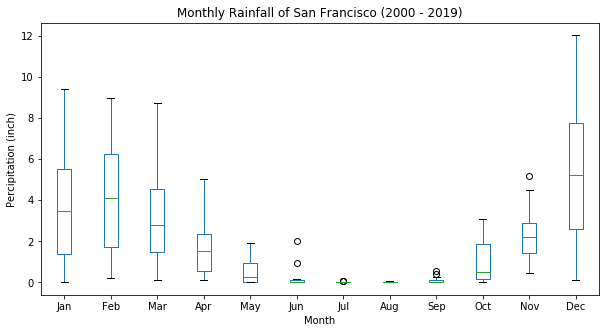

In [21]:
# columns to plot
months = list(sf.columns)[1:13]

plt.figure(figsize = (10, 5))
sf_box = sf[months].boxplot(widths = 0.3, grid = False)
plt.xlabel('Month')
plt.ylabel('Percipitation (inch)')
plt.title('Monthly Rainfall of San Francisco (2000 - 2019)')
plt.show()

You can see it is quite easy to make the plot. What if we want to plot the data of Sacramento side by side. This becomes a fairly hard task for wide data. As you can see in the below, we have to plot the two dataframes separately, specify the width and position of each dataframe (otherwise they will overlap), and place the xticks at the center of two boxes. This is a lot of work and tweeking.

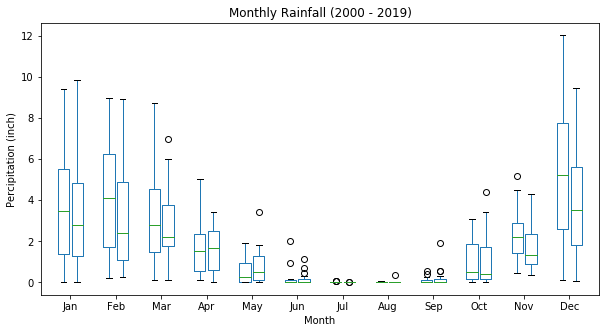

In [61]:
plt.figure(figsize = (10, 5))
sf_box = sf[months].boxplot(widths = 0.25, positions=np.arange(12), grid = False)
sac_box = sac[months].boxplot(widths = 0.25, positions=np.arange(0.3,12.3,1.0), grid = False)
plt.xlabel('Month')
plt.ylabel('Percipitation (inch)')
plt.title('Monthly Rainfall (2000 - 2019)')
plt.xticks(np.arange(0.15, 12.15, 1), months)

plt.show()

Now let's try to achieve the same using long farmat. First, we have to convert the data into long format and concat (or merge) the two dataframes.

In [64]:
sf_long = pd.melt(sf, id_vars = ['Year', 'Annual'], value_vars = months)
sf_long.rename(columns = {'variable': 'Month', 'value': 'Percipitation'}, inplace = True)
sf_long['City'] = 'SF'

sac_long = pd.melt(sac, id_vars = ['Year', 'Annual'], value_vars = months)
sac_long.rename(columns = {'variable': 'Month', 'value': 'Percipitation'}, inplace = True)
sac_long['City'] = 'Sacramento'

In [65]:
combine_long = pd.concat([sf_long, sac_long], sort = False)
combine_long

,Year,Annual,Month,Percipitation,City
0,2000,25.01,Jan,6.41,SF
1,2001,31.79,Jan,3.76,SF
2,2002,22.46,Jan,2.13,SF
3,2003,19.80,Jan,1.75,SF
4,2004,23.23,Jan,3.40,SF
...,...,...,...,...,...
235,2015,8.15,Dec,1.83,Sacramento
236,2016,22.86,Dec,3.77,Sacramento
237,2017,27.15,Dec,0.13,Sacramento
238,2018,19.02,Dec,2.65,Sacramento


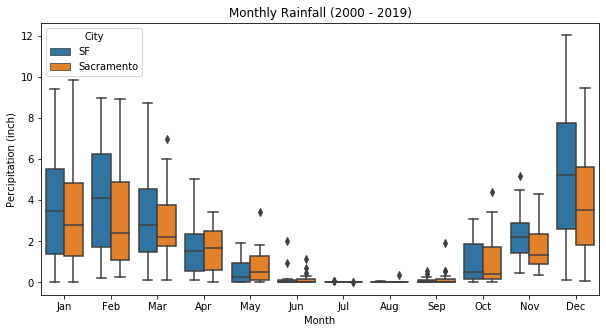

In [67]:
plt.figure(figsize = (10, 5))
sf_box_long = sns.boxplot(y = 'Percipitation', x = 'Month', hue = 'City', data = combine_long)
plt.xlabel('Month')
plt.ylabel('Percipitation (inch)')
plt.title('Monthly Rainfall (2000 - 2019)')
plt.show()